In [1]:
import sys
sys.path.append("../..")

import xarray as xr
import numpy as np
import xarray as xr
import os
from tqdm.autonotebook import tqdm
import keras
from surgeNN import io,preprocessing
from scipy.stats import rankdata
import datetime
import fnmatch
import gc
import tensorflow as tf
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs


/tmp/ipykernel_6164/3837672089.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
2025-07-28 10:53:55.125812: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-28 10:53:55.187776: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
predictor_path = 'gs://leap-persistent/timh37/HighResMIP/surgeNN_predictors/' #path to predictor data derived from highresmip model
predictors = io.Predictor(predictor_path)
predictor_vars = ['msl','u10','v10']
predictors.open_dataset('den_helder-denhdr-nld-rws.csv',predictor_vars,20)

[LON,LAT] = np.meshgrid(predictors.data.longitude,predictors.data.latitude)
predictors=predictors.data.load()

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/core/dataset.py:255: UserWarning: The specified Dask chunks separate the stored chunks along dimension "time" starting at index 198544. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/core/dataset.py:255: UserWarning: The specified Dask chunks separate the stored chunks along dimension "lat_around_tg" starting at index 13. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/core/dataset.py:255: UserWarning: The specified Dask chunks separate the stored chunks along dimension "lon_around_tg" starting at index 13. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


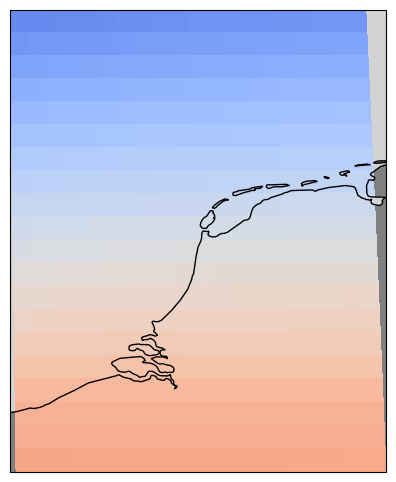

In [28]:
fig=plt.figure(figsize=(5,6)) #generate figure  
gs = fig.add_gridspec(1,1)
gs.update(hspace=.2)
ax = plt.subplot(gs[0,0],projection=ccrs.Robinson(central_longitude=0))

ax.add_feature(cartopy.feature.OCEAN, zorder=0,facecolor='lightgrey')
ax.add_feature(cartopy.feature.LAND, zorder=0, facecolor='grey')
ax.coastlines(zorder=4,color='black')
p=ax.pcolor(LON,LAT,predictors.msl.mean(dim='time'),transform=ccrs.PlateCarree(),cmap='coolwarm',zorder=1,vmin=101300,vmax=101800)

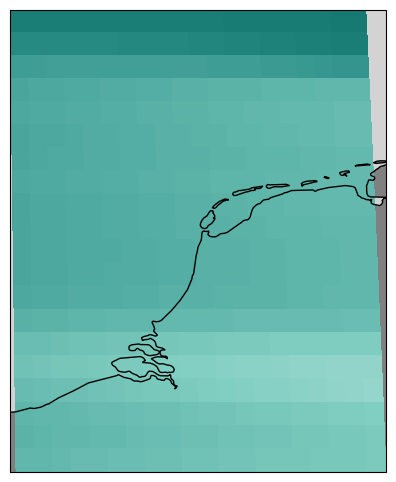

In [16]:
fig=plt.figure(figsize=(5,6)) #generate figure  
gs = fig.add_gridspec(1,1)
gs.update(hspace=.2)
ax = plt.subplot(gs[0,0],projection=ccrs.Robinson(central_longitude=0))

ax.add_feature(cartopy.feature.OCEAN, zorder=0,facecolor='lightgrey')
ax.add_feature(cartopy.feature.LAND, zorder=0, facecolor='grey')
ax.coastlines(zorder=4,color='black')
p=ax.pcolor(LON,LAT,predictors.u10.quantile(.8,dim='time'),transform=ccrs.PlateCarree(),cmap='BrBG',zorder=1,vmin=-10,vmax=10)

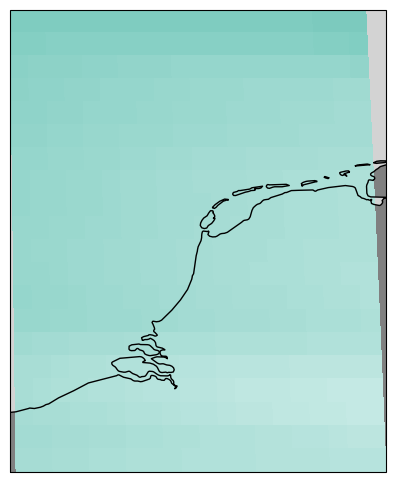

In [17]:
fig=plt.figure(figsize=(5,6)) #generate figure  
gs = fig.add_gridspec(1,1)
gs.update(hspace=.2)
ax = plt.subplot(gs[0,0],projection=ccrs.Robinson(central_longitude=0))

ax.add_feature(cartopy.feature.OCEAN, zorder=0,facecolor='lightgrey')
ax.add_feature(cartopy.feature.LAND, zorder=0, facecolor='grey')
ax.coastlines(zorder=4,color='black')
p=ax.pcolor(LON,LAT,predictors.v10.quantile(.8,dim='time'),transform=ccrs.PlateCarree(),cmap='BrBG',zorder=1,vmin=-10,vmax=10)

In [10]:
#setttings
predictors_era5 = io.Predictor('gs://leap-persistent/timh37/era5_predictors/3hourly/')
predictors_era5.open_dataset('den_helder-denhdr-nld-rws.csv',predictor_vars,20)
predictors_era5 = predictors_era5.data.load()

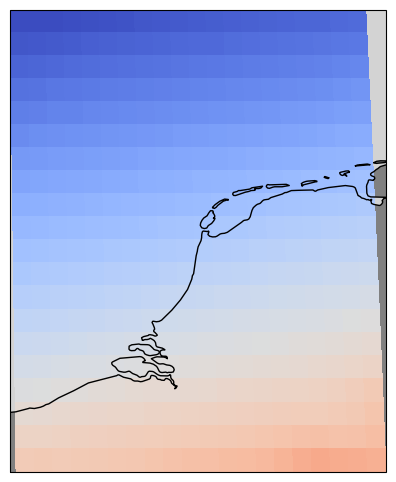

In [29]:
fig=plt.figure(figsize=(5,6)) #generate figure  
gs = fig.add_gridspec(1,1)
gs.update(hspace=.2)
ax = plt.subplot(gs[0,0],projection=ccrs.Robinson(central_longitude=0))

ax.add_feature(cartopy.feature.OCEAN, zorder=0,facecolor='lightgrey')
ax.add_feature(cartopy.feature.LAND, zorder=0, facecolor='grey')
ax.coastlines(zorder=4,color='black')
p=ax.pcolor(LON,LAT,predictors_era5.msl.mean(dim='time'),transform=ccrs.PlateCarree(),cmap='coolwarm',zorder=1,vmin=101300,vmax=101800)

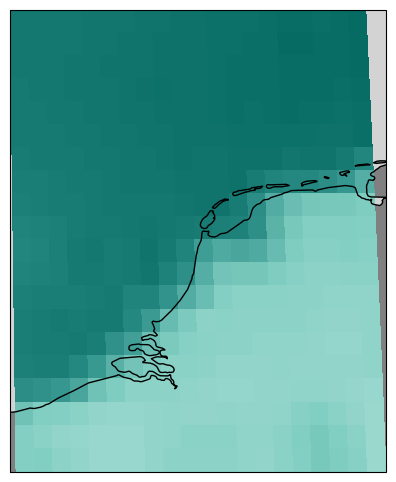

In [15]:
fig=plt.figure(figsize=(5,6)) #generate figure  
gs = fig.add_gridspec(1,1)
gs.update(hspace=.2)
ax = plt.subplot(gs[0,0],projection=ccrs.Robinson(central_longitude=0))

ax.add_feature(cartopy.feature.OCEAN, zorder=0,facecolor='lightgrey')
ax.add_feature(cartopy.feature.LAND, zorder=0, facecolor='grey')
ax.coastlines(zorder=4,color='black')
p=ax.pcolor(LON,LAT,predictors_era5.u10.quantile(.8,dim='time'),transform=ccrs.PlateCarree(),cmap='BrBG',zorder=1,vmin=-10,vmax=10)

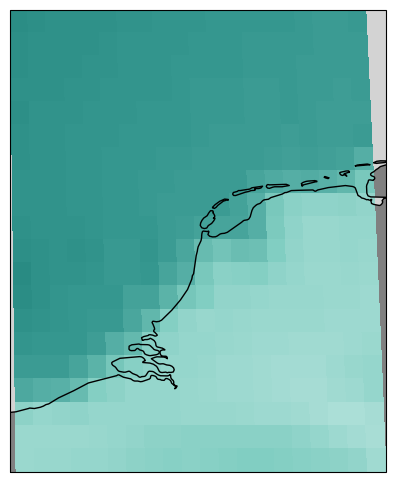

In [14]:
fig=plt.figure(figsize=(5,6)) #generate figure  
gs = fig.add_gridspec(1,1)
gs.update(hspace=.2)
ax = plt.subplot(gs[0,0],projection=ccrs.Robinson(central_longitude=0))

ax.add_feature(cartopy.feature.OCEAN, zorder=0,facecolor='lightgrey')
ax.add_feature(cartopy.feature.LAND, zorder=0, facecolor='grey')
ax.coastlines(zorder=4,color='black')
p=ax.pcolor(LON,LAT,predictors_era5.v10.quantile(.8,dim='time'),transform=ccrs.PlateCarree(),cmap='BrBG',zorder=1,vmin=-10,vmax=10)